__Purpose:__ Analyze basic personalization scheme of simply doing Smoothbatch between the global and local models.  E.g. model interpolation to get a personalized model.
> Observed results: the personalized model literally just inhabits the space between the local and global models, which makes sense since it's just a weighting between the two.  Does this imply that the cost function is simpler than we thought (e.g. there aren't as many local mins and it's sort of just a 1D scale like we were seeing before)?
- Can vary smoothbatch (percent new vs old)

In [1]:
import pandas as pd
import os
import numpy as np
import random
from matplotlib import pyplot as plt
from scipy.optimize import minimize
import copy

from experiment_params import *
from cost_funcs import *
from fl_sim_classes import *
import time
import pickle
from sklearn.decomposition import PCA

In [2]:
path = r'C:\Users\kdmen\Desktop\Research\personalization-privacy-risk\Data'
cond0_filename = r'\cond0_dict_list.p'
all_decs_init_filename = r'\all_decs_init.p'
nofl_decs_filename = r'\nofl_decs.p'
id2color = {0:'lightcoral', 1:'maroon', 2:'chocolate', 3:'darkorange', 4:'gold', 5:'olive', 6:'olivedrab', 
            7:'lawngreen', 8:'aquamarine', 9:'deepskyblue', 10:'steelblue', 11:'violet', 12:'darkorchid', 13:'deeppink'}
implemented_client_training_methods = ['EtaGradStep', 'EtaScipyMinStep', 'FullScipyMinStep']
implement_these_methods_next = ['APFL', 'AFL', 'PersA_FL_MAML', 'PersA_FL_ME', 'PFA']
num_participants = 14

# For exclusion when plotting later on
bad_nodes = [1,3,13]

with open(path+cond0_filename, 'rb') as fp:
    cond0_training_and_labels_lst = pickle.load(fp)
    
with open(path+all_decs_init_filename, 'rb') as fp:
    init_decoders = pickle.load(fp)
cond0_init_decs = [dec[0, :, :] for dec in init_decoders]

D_0 = np.random.rand(2,64)
D_0_7 = np.random.rand(2,7)

# Federated Learning: FedAvgSB
## 1 Scipy Step, 500 Iterations
> Note that the thicker, lighter lines are the global model accuracies, whereas the thin lines are the local accuracies.

Client 1: New update after lrt passed: (new update, current global round, current local round): (11, 0, 25)

Client 1: New update after lrt passed: (new update, current global round, current local round): (12, 0, 50)

Client 1: New update after lrt passed: (new update, current global round, current local round): (13, 0, 75)

Client 1: New update after lrt passed: (new update, current global round, current local round): (14, 0, 100)

Client 1: New update after lrt passed: (new update, current global round, current local round): (15, 0, 125)

Client 1: New update after lrt passed: (new update, current global round, current local round): (16, 0, 150)



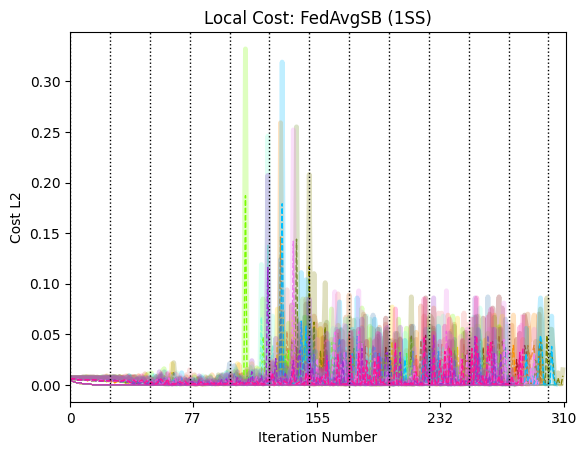

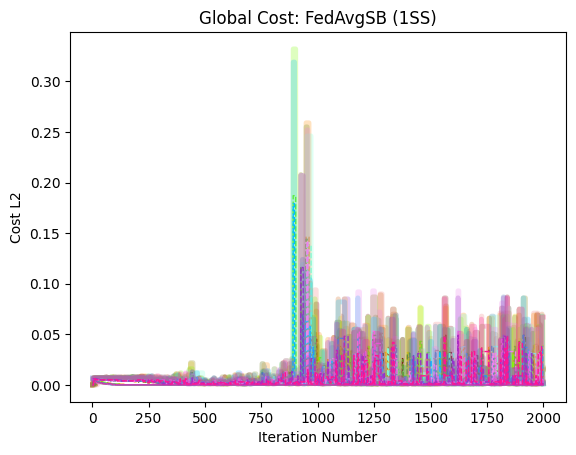

In [3]:
user_c0_1ScipyStep = [Client(i, D_0_7, 'Per-FedAvg', cond0_training_and_labels_lst[i], 'streaming', delay_scaling=0, verbose=True) for i in range(14)]
global_model_1scipystep = Server(1, D_0_7, 'Per-FedAvg', user_c0_1ScipyStep)

big_loop_iters = 500
for i in range(big_loop_iters):
    global_model_1scipystep.execute_FL_loop()
    
condensed_external_plotting(user_c0_1ScipyStep, 'local', pers_error=True, custom_title='Local Cost: Per-FedAvg (1SS)')
condensed_external_plotting(global_model_1scipystep, 'global', pers_error=True, show_update_change=False, custom_title='Global Cost: Per-FedAvg (1SS)')

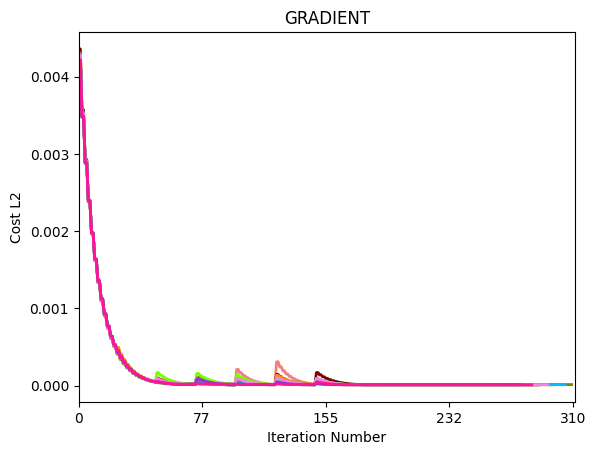

In [4]:
condensed_external_plotting(user_c0_1ScipyStep, 'local', plot_gradient=True, local_error=False, global_error=False, show_update_change=False, custom_title='GRADIENT')

## 10 Steps

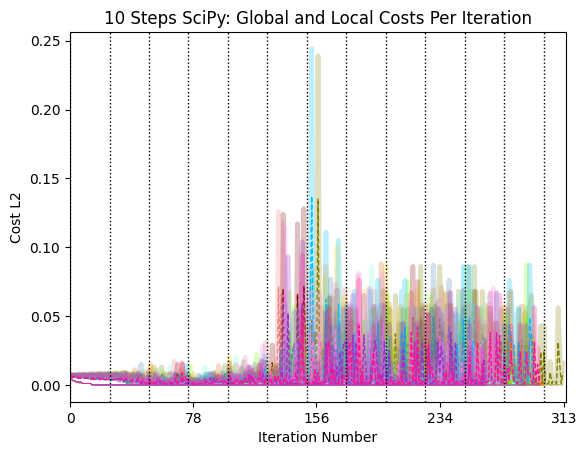

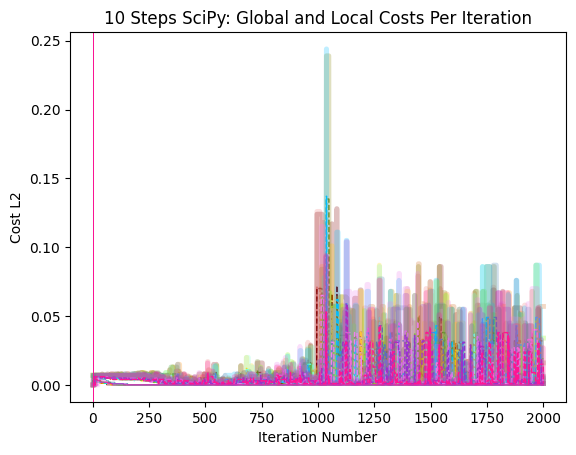

In [9]:
user_c0_10scipy = [Client(i, D_0_7, 'Per-FedAvg', cond0_training_and_labels_lst[i], 'streaming', num_steps=10, delay_scaling=0) for i in range(14)]
global_model_10scipy = Server(2, D_0_7, 'Per-FedAvg', user_c0_10scipy)

for i in range(big_loop_iters):
    global_model_10scipy.execute_FL_loop()
    
condensed_external_plotting(user_c0_10scipy, 'local', pers_error=True, custom_title='10 Steps SciPy: Global and Local Costs Per Iteration')
condensed_external_plotting(global_model_10scipy, 'global', pers_error=True, custom_title='10 Steps SciPy: Global and Local Costs Per Iteration')

## Full Scipy.Minimize
> Remember we are starting at update 10 already!!

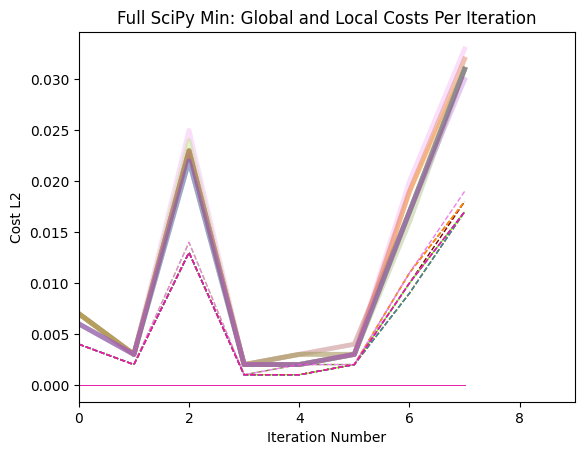

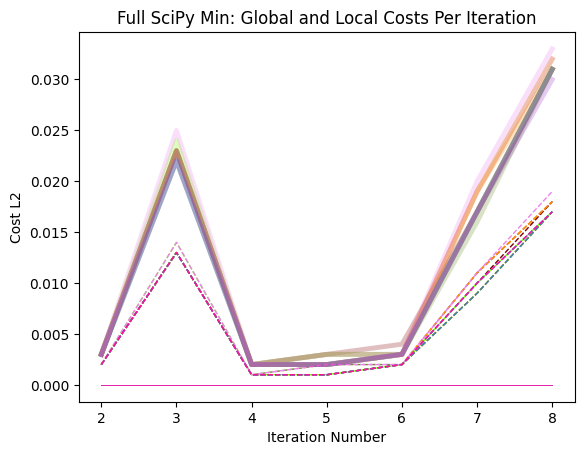

In [13]:
user_c0_fullscipy = [Client(i, D_0_7, 'Per-FedAvg', cond0_training_and_labels_lst[i], 'advance_each_iter', delay_scaling=0) for i in range(14)]
global_model_fullscipy = Server(4, D_0_7, 'Per-FedAvg', user_c0_fullscipy, C=1)

for i in range(8):
    global_model_fullscipy.execute_FL_loop()
    
condensed_external_plotting(user_c0_fullscipy, 'local', pers_error=True, dim_reduc_factor=1, show_update_change=False, custom_title='Full SciPy Min: Global and Local Costs Per Iteration')
condensed_external_plotting(global_model_fullscipy, 'global', pers_error=True, dim_reduc_factor=1, show_update_change=False, custom_title='Full SciPy Min: Global and Local Costs Per Iteration')
